In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.graph_objs as go

In [2]:
# load global confirmed cases and deaths
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
cases.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
deaths.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [5]:
# Countries, having spesified Provinces
# cases.iloc[np.where(cases["Province/State"].notna())[0],:]["Country/Region"].value_counts()

In [6]:
# Extract data for Russia
r_cases = cases[cases["Country/Region"]=="Russia"].iloc[:, 4:].T
r_deaths = deaths[deaths["Country/Region"]=="Russia"].iloc[:, 4:].T
r_cases.columns = ['Cases']
r_cases.index = pd.DatetimeIndex(r_cases.index)
r_deaths.columns = ['Deaths']
r_deaths.index = pd.DatetimeIndex(r_deaths.index)

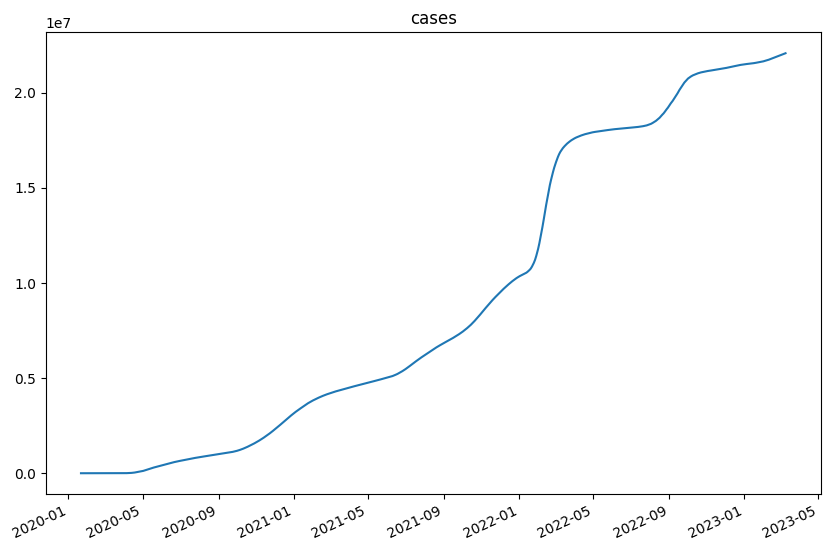

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(r_cases)
plt.xticks(rotation=25, ha='right')
plt.title("cases")
plt.show()
# plt.figure(figsize=(10, 6))
# plt.plot(r_deaths)
# plt.xticks(rotation=25, ha='right')
# plt.title("deaths")
# plt.show()

In [8]:
def to_daily(arr):
    arr=arr.values.T[0]
    res = list()
    for i in range(len(arr)-1):
        res.append(arr[i+1]-arr[i])
    return res

In [9]:
daily_cases = to_daily(r_cases)
daily_deaths = to_daily(r_deaths)

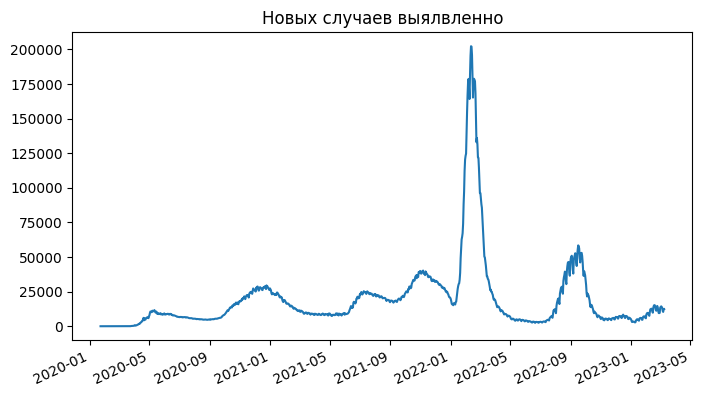

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(r_cases.index[1:], daily_cases, label="Daily cases")
plt.xticks(rotation=25, ha='right')
plt.title("Новых случаев выялвленно")
plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(daily_deaths, 'C1', label="Daily deaths")
# plt.title("Daily deaths")
# plt.show()

<ipython-input-11-039c5eedafd4>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(daily_cases)[80:], label="confirmed")
<ipython-input-11-039c5eedafd4>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(daily_deaths)[80:], label="deaths")


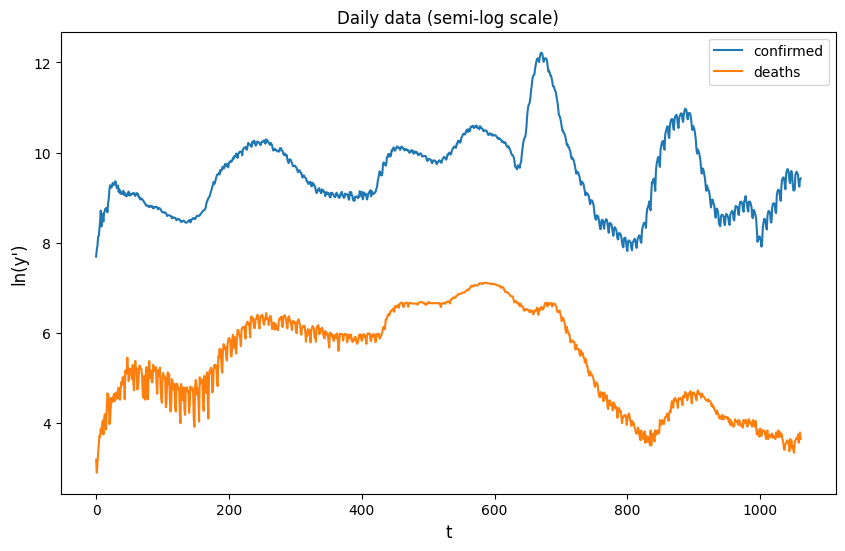

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.log(daily_cases)[80:], label="confirmed")
plt.plot(np.log(daily_deaths)[80:], label="deaths")
plt.xlabel("t", size=12)
plt.ylabel("ln(y')", size=12)
plt.legend()
plt.title("Daily data (semi-log scale)")
plt.show()

In [12]:
from scipy.stats import pearsonr

pearsonr(np.log(daily_cases)[80:], np.log(daily_deaths)[80:])

<ipython-input-12-21fccc4f0222>:3: RuntimeWarning: divide by zero encountered in log
  pearsonr(np.log(daily_cases)[80:], np.log(daily_deaths)[80:])


PearsonRResult(statistic=0.6428192714626842, pvalue=7.477476114517932e-125)

### Анаморфоза

In [13]:
# Анаморфоза
def anamorf(data, start, stop):
    accum_l = [0, ]
    anamorf = list()
    for i in data[start:stop]:
        accum_l.append(accum_l[-1]+i)
        anamorf.append(np.log(i / accum_l[-1]))
    return anamorf, accum_l[1:]

In [14]:
# Для определения параметров
def ne_anamorf(data, start, stop, typ='gompertz', step=1):
    accum_l = [0, ]
    anamorf = list()
    for i in data[start:stop][::step]:
        accum_l.append(accum_l[-1]+i)
        anamorf.append(i / accum_l[-1])
    if typ=='logistic':
        return accum_l[1:], anamorf
    return np.log(accum_l[1:]).reshape((1,-1))[0], anamorf

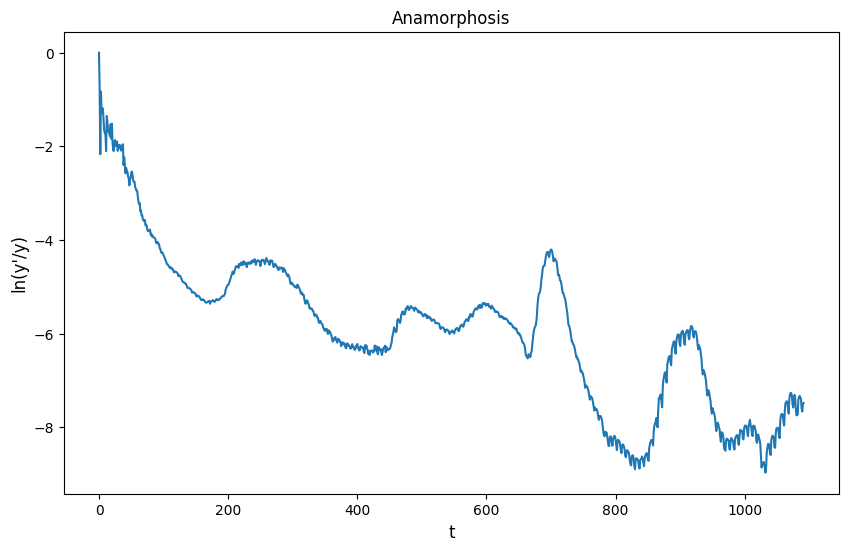

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(anamorf(daily_cases, 50, len(daily_cases))[0])
plt.title("Anamorphosis")
plt.xlabel("t", size=12)
plt.ylabel("ln(y'/y)", size=12)
plt.show()

In [16]:
# Ручное выделение "волн"
waves = ((230, 430), (500, 600), (600, 710), (720, 790), (900, 1020))

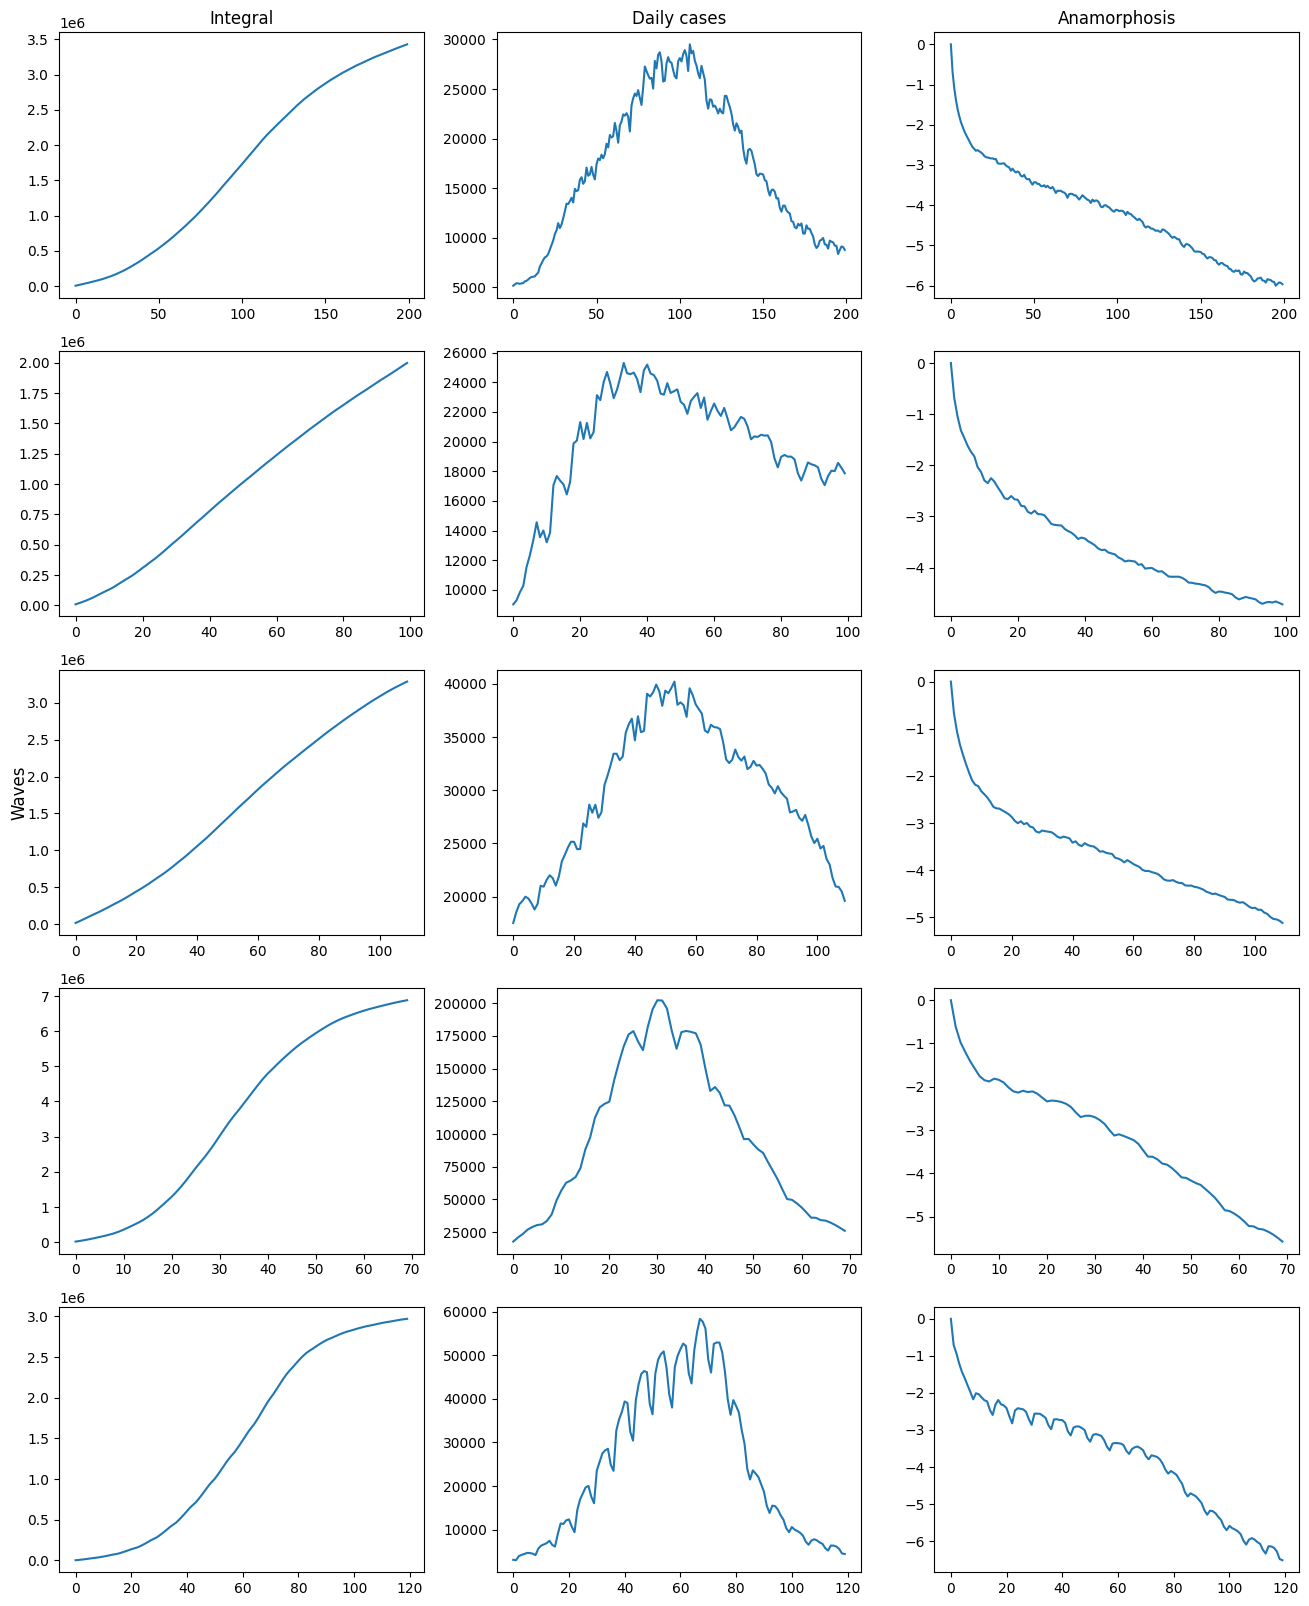

In [17]:
# Подробный взгляд на каждую "волну"
fig, axs = plt.subplots(len(waves), 3, figsize=(16, 20))
fig.text(0.10, 0.5, 'Waves', ha='center', va='center', rotation='vertical', size=12)

# model = LinearRegression()

axs[0, 0].set_title("Integral")
axs[0, 1].set_title("Daily cases")
axs[0, 2].set_title("Anamorphosis")
# axs[0, 3].set_title("ln(y)")
for i in range(len(waves)):
    anam, accum = anamorf(daily_cases, *waves[i])
    axs[i, 0].plot(accum)
    axs[i, 1].plot(daily_cases[waves[i][0]:waves[i][1]])
    axs[i, 2].plot(anam) # Брать отступ?
    # a, b = ne_anamorf(daily_cases, *waves[i])
    # axs[i, 3].plot(a, b)
    # model.fit(a.reshape((-1, 1)), b)
    # axs[i, 3].plot(a, [(model.intercept_ + model.coef_*x)[0] for x in a], label=f'k={model.coef_[0][0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_[0]/model.coef_[0][0]*-1):,.0f}')
    # axs[i, 3].legend()
    # print(f"{np.e**(model.intercept_[0]/model.coef_[0][0]*-1):.0f}")
plt.show()

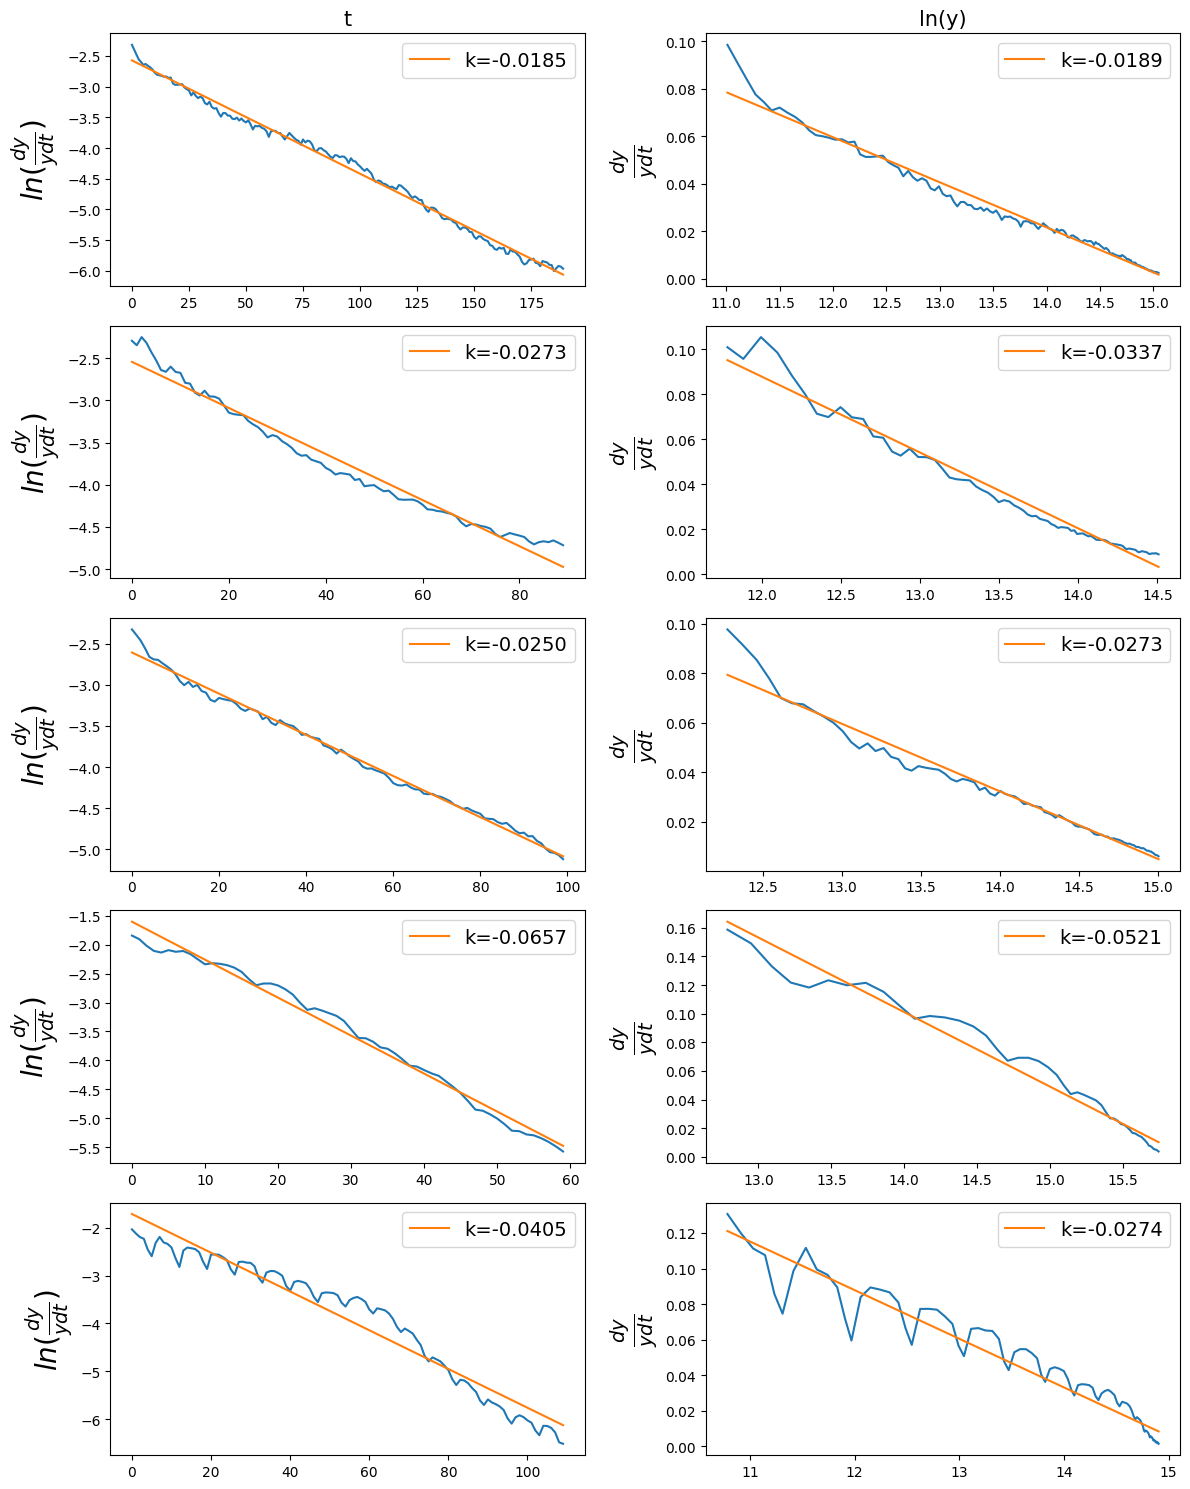

In [18]:
# Сравнение подходов определения параметра k (угол наклона) для модели Гомпертца
model = LinearRegression()

fig, axs = plt.subplots(len(waves), 2, figsize=(12,15))
g_params = list()
for i in range(len(waves)):
    # Gompertz 1
    anam, acum = anamorf(daily_cases, *waves[i])
    axs[i, 0].plot(anam[10:])
    ts = np.array(range(len(acum[10:])))
    model.fit(ts.reshape((-1, 1)), anam[10:])
    axs[i, 0].plot(ts, [(model.intercept_ + model.coef_*x)[0] for x in ts], label=f'k={model.coef_[0]:.4f}')
    axs[i, 0].legend(prop={'size': 14})
    axs[i, 0].set_ylabel(r"$ln(\frac{dy}{ydt})$", size=20)
    g_params.append([-model.coef_[0], ])

    # Gompertz 2
    step = 1
#     if i == 4:
#         step = -1  # For last wave
    acum, anam = ne_anamorf(daily_cases, *waves[i], step=step)

    axs[i, 1].plot(acum[10:], anam[10:])
    model.fit(acum[10:].reshape((-1, 1)), anam[10:])

#     if i == 4:
#         if step == 1:
#             axs[i, 1].plot(acum[10:], [(model.intercept_+0.01 + (model.coef_)*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')
#             axs[i, 1].plot(acum[10:], [(model.intercept_-0.1 + (model.coef_+0.007)*x)[0] for x in acum[10:]], c='tab:orange')
#         else:
#             edge = len(acum) // 3
#             model.fit(acum[10:edge].reshape((-1, 1)), anam[10:edge])
#             axs[i, 1].plot(acum[10:], [(model.intercept_-0.19 + model.coef_*x*0)[0] for x in acum[10:]])
#             model.fit(acum[10:-edge].reshape((-1, 1)), anam[10:-edge])
#             axs[i, 1].plot(acum[10:], [(model.intercept_+0.36 + (model.coef_-0.025)*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]-0.025:.4f}')
#     else:
#         axs[i, 1].plot(acum[10:], [(model.intercept_ + model.coef_*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}')

    axs[i, 1].plot(acum[10:], [(model.intercept_ + model.coef_*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}')

    axs[i, 1].legend(prop={'size': 14})
    axs[i, 1].set_ylabel(r"$\frac{dy}{ydt}$", size=20)
    g_params[-1].append(np.e**(model.intercept_/model.coef_[0]*-1))

# g_params[-1]=[-(model.coef_[0]-0.025), np.e**(model.intercept_/model.coef_[0]*-1)]

axs[0, 0].set_title("t", size=15)
axs[0, 1].set_title("ln(y)", size=15)
plt.tight_layout()
plt.show()

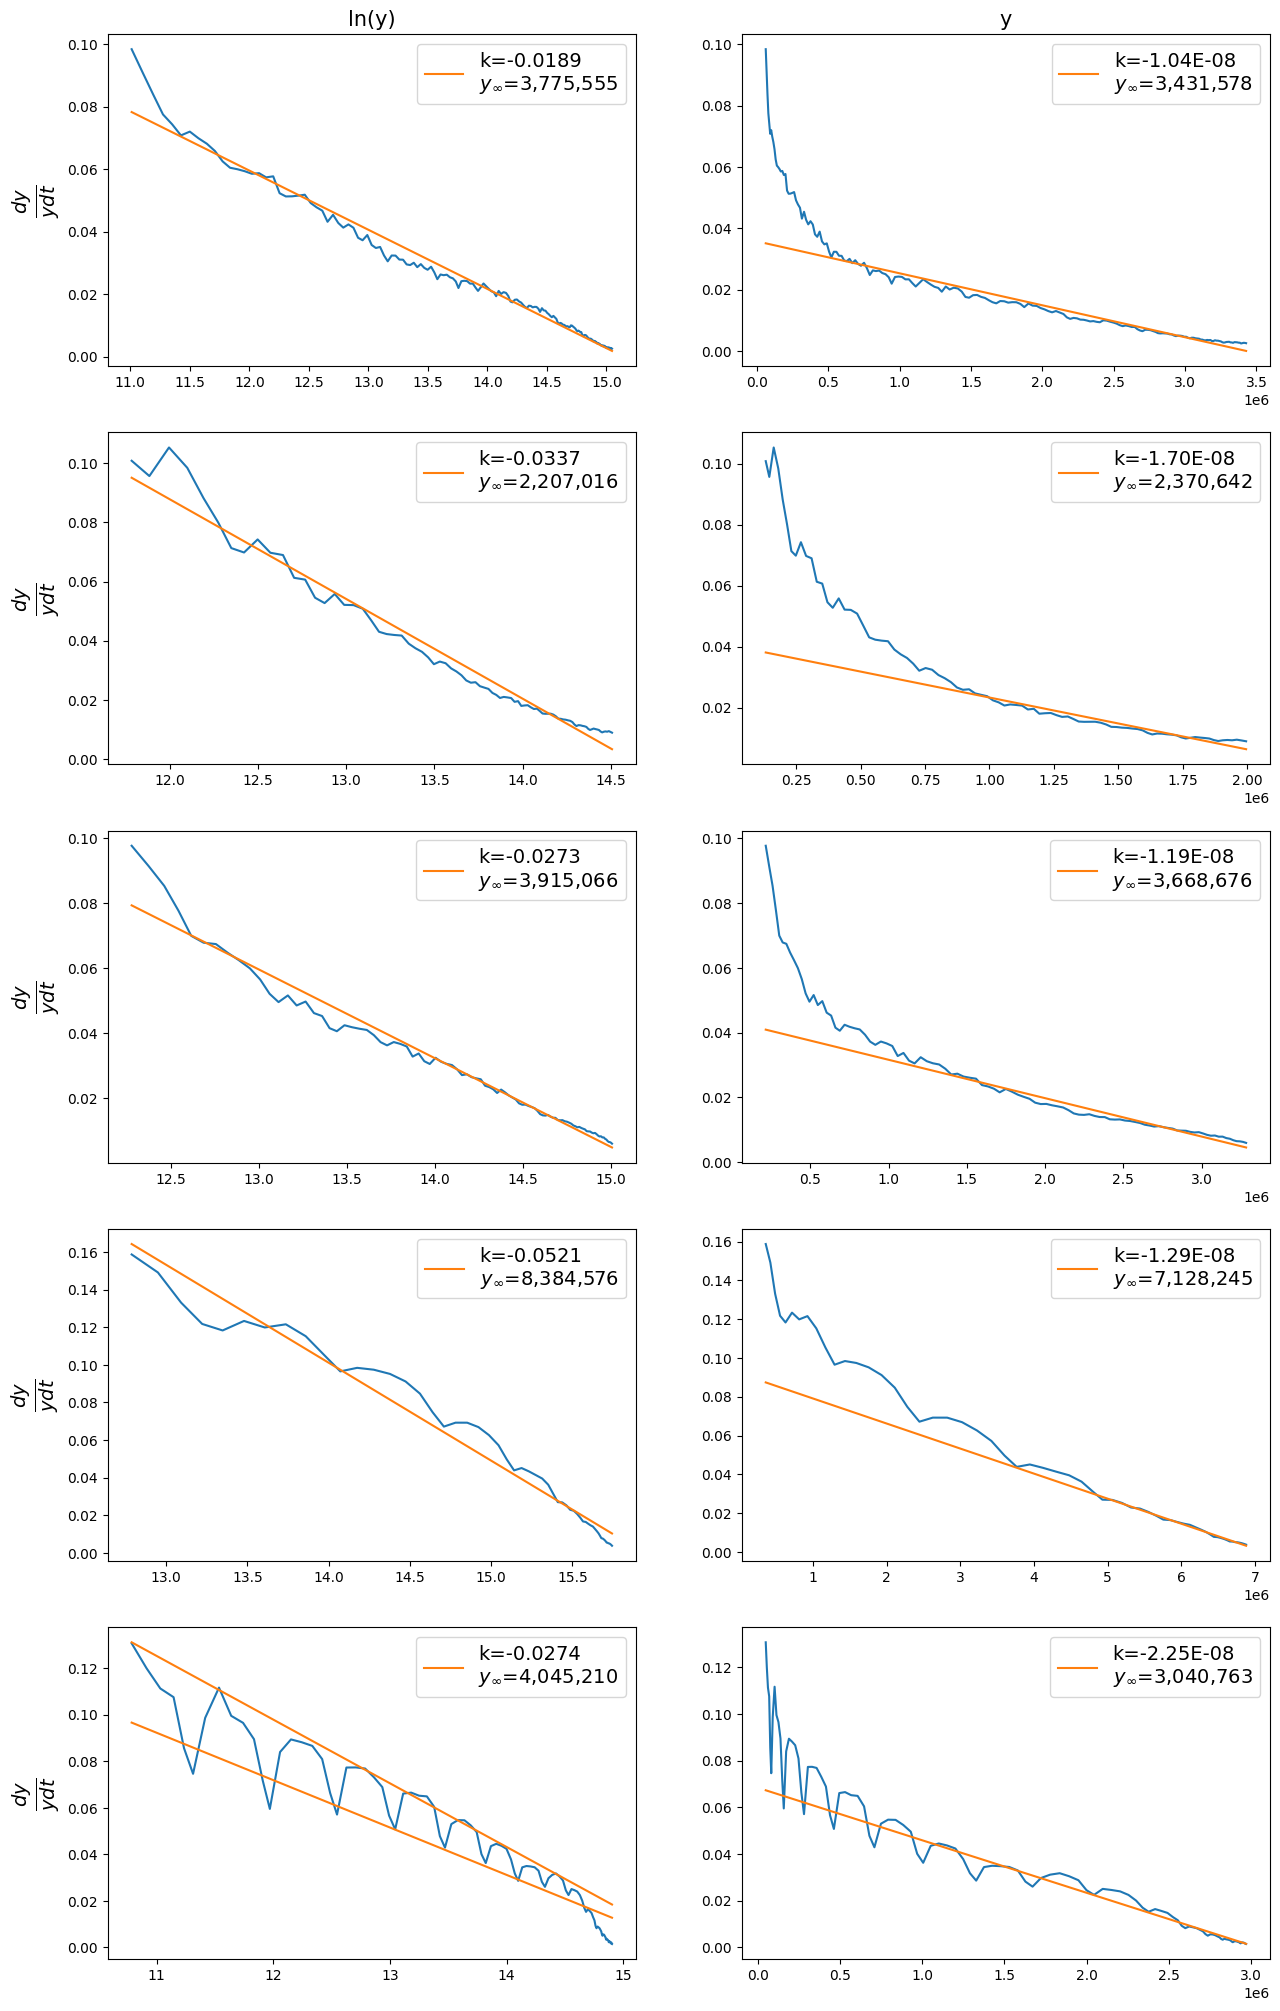

In [19]:
# Сравнение логистической модели и модели Гомпертца (определение параметров)
model = LinearRegression()

fig, axs = plt.subplots(len(waves), 2, figsize=(15, 25))
for i in range(len(waves)):
    # Gompertz
    step = 1
#     if i == 4:
#         step = -1
    a, b = ne_anamorf(daily_cases, *waves[i], step=step)
    axs[i, 0].plot(a[10:], b[10:])
    model.fit(a[10:].reshape((-1, 1)), b[10:])

    if i == 4:
        if step == 1:
            axs[i, 0].plot(a[10:], [(model.intercept_+0.01 + (model.coef_)*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')
            axs[i, 0].plot(a[10:], [(model.intercept_-0.1 + (model.coef_+0.007)*x)[0] for x in a[10:]], c='tab:orange')
#         else:
#             edge = len(a) // 3
#             model.fit(a[10:edge].reshape((-1, 1)), b[10:edge])
#             axs[i, 0].plot(a[10:], [(model.intercept_-0.19 + model.coef_*x*0)[0] for x in a[10:]])
#             model.fit(a[20:-edge].reshape((-1, 1)), b[20:-edge])
#             axs[i, 0].plot(a[20:], [(model.intercept_+0.36 + (model.coef_-0.025)*x)[0] for x in a[20:]], label=f'k={model.coef_[0]-0.025:.4f}\n'+r'$y_\infty$'+f'={np.e**((model.intercept_+0.36)/(model.coef_[0]-0.025)*-1):,.0f}')
    else:
        axs[i, 0].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')

#     axs[i, 0].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')

    axs[i, 0].legend(prop={'size': 14})
    axs[i, 0].set_ylabel(r"$\frac{dy}{ydt}$", size=20)

    # Logistic
    a, b = ne_anamorf(daily_cases, *waves[i], typ='logistic')
    axs[i, 1].plot(a[10:], b[10:])
    model.fit(np.array(a[40:]).reshape((-1, 1)), b[40:])
    axs[i, 1].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.2E}\n'+r'$y_\infty$'+f'={model.intercept_/model.coef_[0]*-1:,.0f}')
    axs[i, 1].legend(prop={'size': 14})
    g_params[i].append(model.intercept_/model.coef_[0]*-1)

axs[0, 0].set_title("ln(y)", size=15)
axs[0, 1].set_title("y", size=15)
plt.show()

In [20]:
def gomp_model(k, y_max, y_0, t_range):
    accum = [y_0, ]
    daily = list()
    for t in range(t_range):
        y = accum[-1]
        dy = k*y*(np.log(y_max)-np.log(y))
        daily.append(dy)
        accum.append(y+dy)
    return accum, daily

In [21]:
def log_model(y_0, y_max, k, t_range):
    accum = [y_0, ]
    daily = list()
    while (y_max - accum[-1]) >= y_0:
#     for t in range(t_range):
        y = accum[-1]
        dy = k*y*(1-y/y_max)
        daily.append(dy)
        accum.append(y+dy)
    return accum, daily

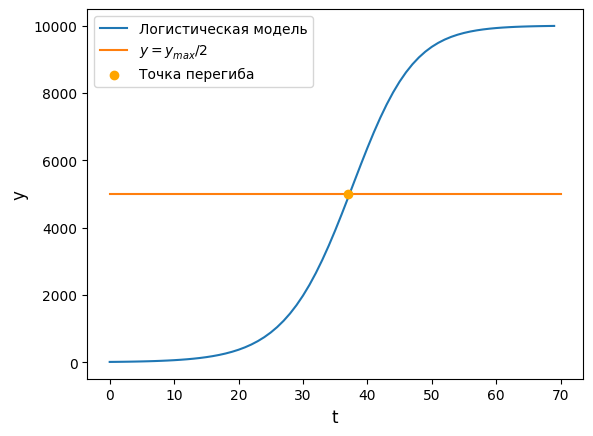

In [23]:
plt.plot(log_model(10, 10000, 0.2, 100)[0], zorder=1, label='Логистическая модель')
# plt.plot(gomp_model(0.2, 10000, 10, 100)[0])
plt.plot([0, 70], [5000, 5000], label=r"$y = y_{max}^{} / 2$", zorder=1)
plt.scatter(37, 5000, color='orange', label='Точка перегиба')
plt.legend()
plt.xlabel("t", size=12)
plt.ylabel("y", size=12)
plt.show()

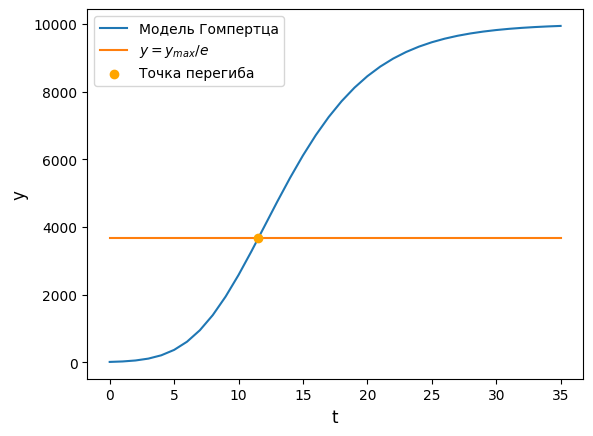

In [24]:
# plt.plot(log_model(10, 10000, 0.2, 100)[0], zorder=1, label='Логистическая модель')
plt.plot(gomp_model(0.2, 10000, 10, 35)[0], zorder=1, label='Модель Гомпертца')
plt.plot([0, 35], [10000/np.e, 10000/np.e], label=r"$y = y_{max} / e$", zorder=1)
plt.scatter(11.5, 10000/np.e, color='orange', label='Точка перегиба')
plt.legend()
plt.xlabel("t", size=12)
plt.ylabel("y", size=12)
plt.show()

In [25]:
g_params

[[0.018470967350212322, 3775555.292815708, 3431578.1521801045],
 [0.027299530714468643, 2207015.653105395, 2370641.7103442643],
 [0.02504653558391969, 3915065.5567023703, 3668675.5685973656],
 [0.06573969651563867, 8384576.096622338, 7128244.80431667],
 [0.04050336601065733, 4045210.201929901, 3040762.555630598]]

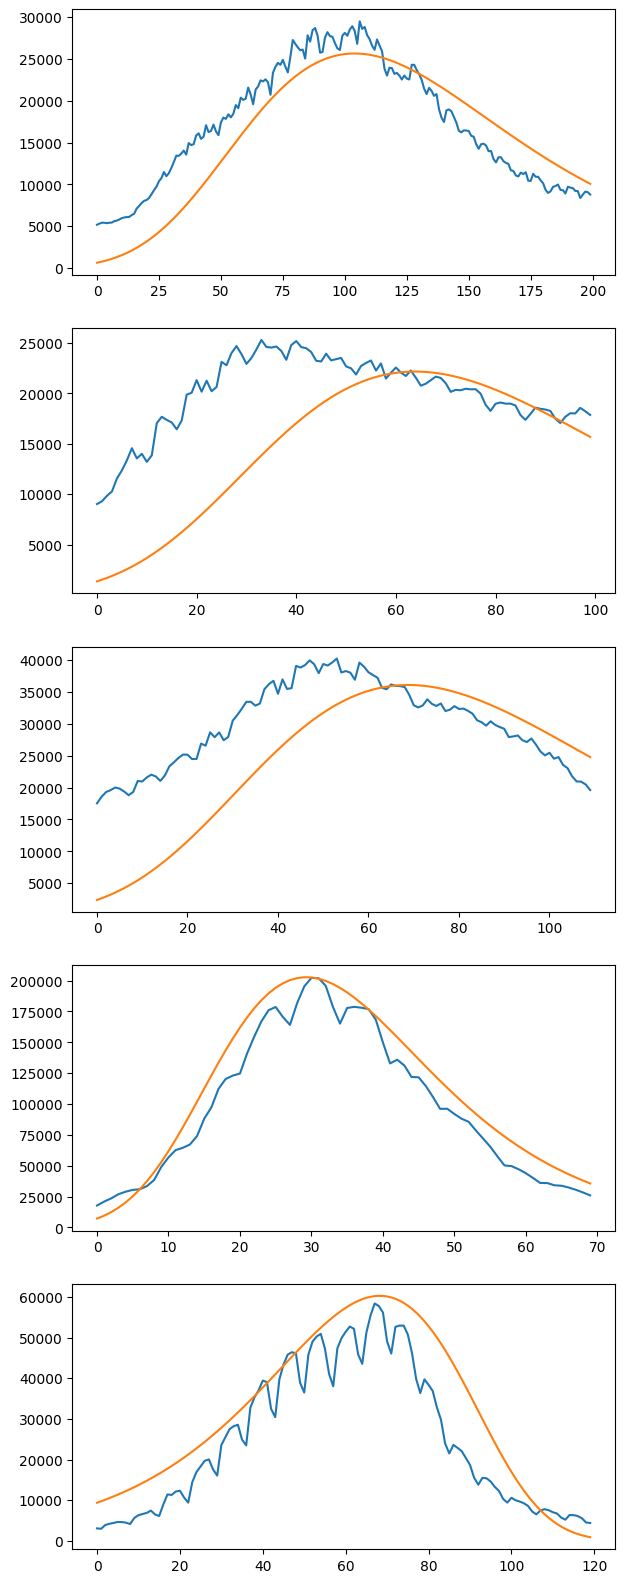

In [26]:
fig, axs = plt.subplots(len(waves), figsize=(7, 20))
#fig.text(0.10, 0.5, 'Waves', ha='center', va='center', rotation='vertical', size=12)

# model = LinearRegression()

# axs[0, 3].set_title("ln(y)")
for i in range(len(waves)):
    test = daily_cases[waves[i][0]:waves[i][1]]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test))[1]
    axs[i].plot(test)
    if i == 4:
        axs[i].plot(model[::-1])
    else: axs[i].plot(model)
plt.show()

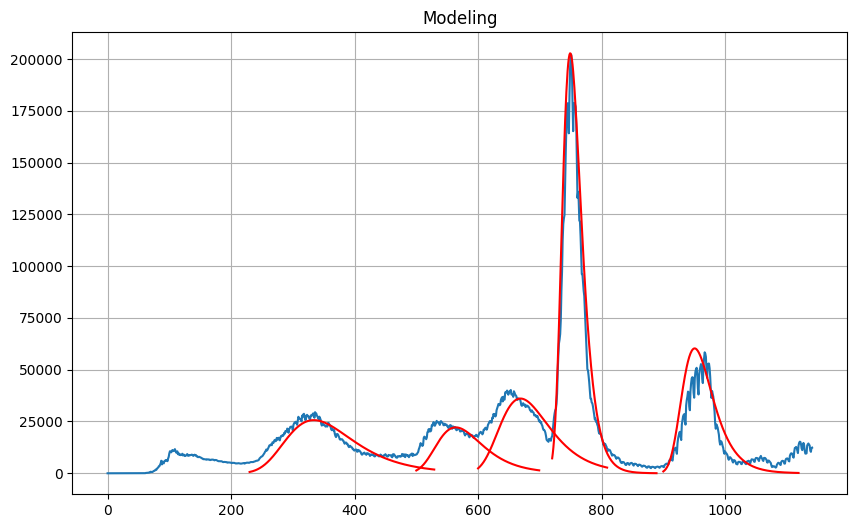

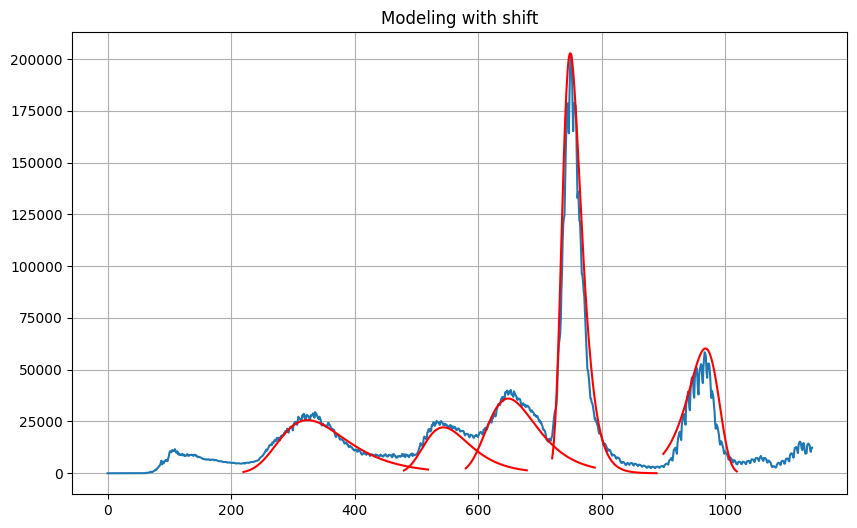

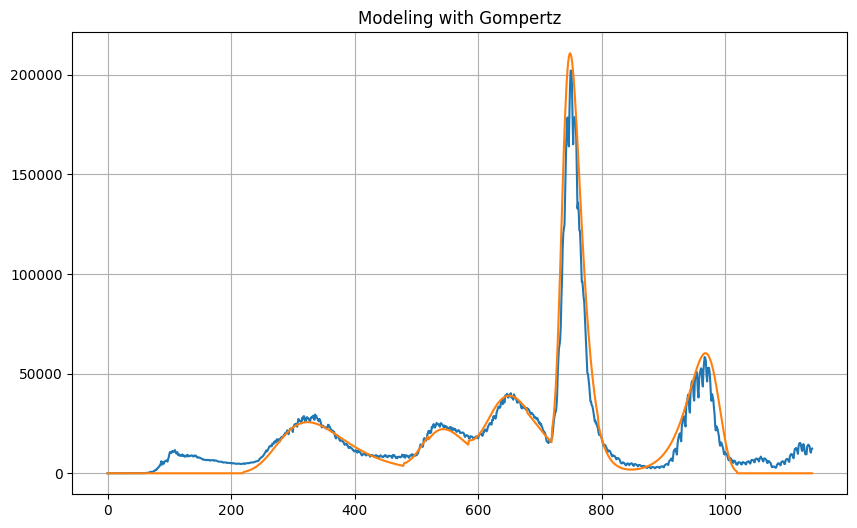

In [27]:
# Наложение модели на реальные данные
plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling")

for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+100)[1]
    plt.plot(range(start, stop+100), model, color='red')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling with shift")

for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    add = 100
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+add)[1]
    if i < 1:
        plt.plot(range(start-10, stop+add-10), model, color='red')
    elif i < 3:
        plt.plot(range(start-20, stop+add-20), model, color='red')
    elif i == 4:
        model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test))[1]
        plt.plot(range(start, stop), model[::-1], color='red')
    else:
        plt.plot(range(start, stop+add), model, color='red')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling with Gompertz")

gompertz_data = [0, ] * len(daily_cases)
for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    add = 100
    sub = 0
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+add)[1]

    # Сдвиг моделей
    if i == 0:
        sub = 10
    elif i == 1:
        sub = 20
    elif i == 2:
        sub = 15

    # Поправка (разворот) для последней модели
    elif i == 4:
        for j in range(start, stop+add):
            gompertz_data[j-add] = gompertz_data[j-add] + model[-(j-start)-1]
        start, stop = (0, -add)

    for j in range(start, stop+add):
        gompertz_data[j-sub] = gompertz_data[j-sub] + model[j-start]

plt.plot(gompertz_data)
plt.grid(True)
plt.show()

In [28]:
MAPE = 0
for i in range(210, 1010):
    MAPE += abs(gompertz_data[i] - daily_cases[i]) / daily_cases[i]
MAPE /= 800
print(f"{MAPE * 100:.2f}%")

27.51%


In [29]:
gompertz_data[300], daily_cases[300]

(22903.75939594856, 20717)

### Убираем тренд

In [30]:
def smooth(data, window):
    new_data = list()
    for i in range(window, len(data)-window):
        if data[i] != 0:
            new_data.append(data[i-window]*data[i+window]/data[i]**2)
        else:
            new_data.append(0)
    return new_data

In [31]:
def shift(data, tau):
    f = 0
    for i in range(len(data[:-tau])):
        f = f + np.abs(data[i] - data[i+tau])
    return f / (len(data) - tau)

In [53]:
# Выбор окна "сглаживания"
plt.figure(figsize=(10, 6))

new_data = list()
for window in range(50):
    new_data.append(np.mean(smooth(daily_cases, window=window)))

fig = go.Figure()
fig.add_trace(go.Scatter(y=new_data, x=list(range(len(new_data)))))
fig.update_layout(
    title="Среднее значение по ряду в зависимости от окна сглаживания (чем ближе к нулю, тем лучше)",
    xaxis_title=r"$\Delta t$",
    yaxis_title="mean",
)
fig.show()

<Figure size 1000x600 with 0 Axes>

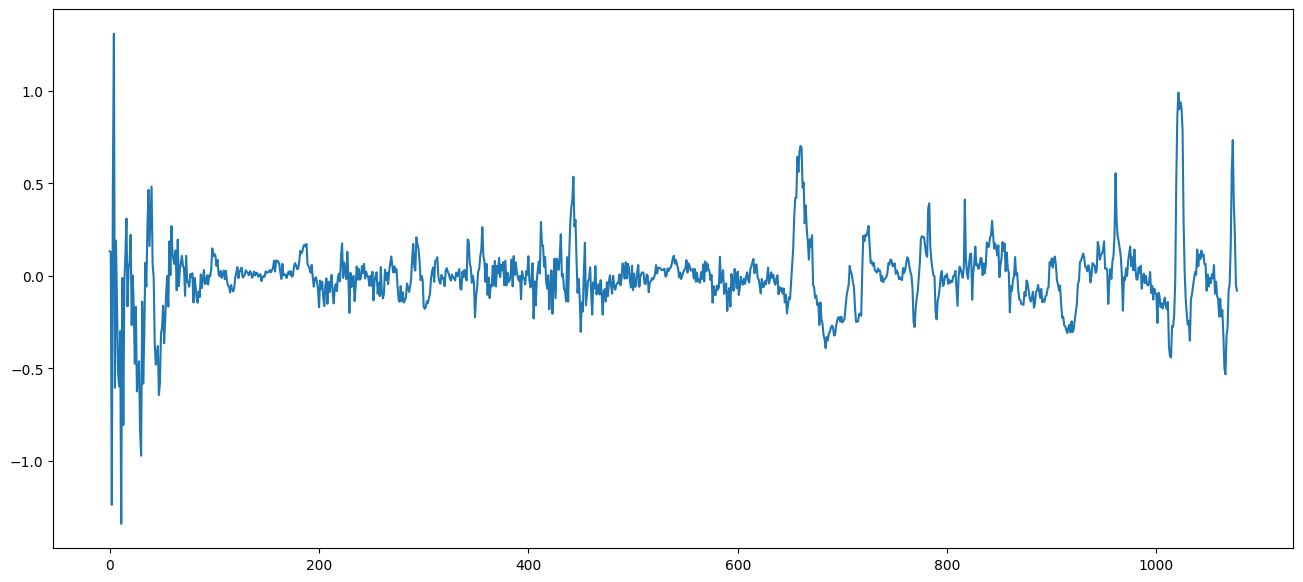

In [33]:
# Ряд без тренда
plt.figure(figsize=(16, 7))
# Берём семидневное окно, чтобы убрать период кратный семи
new_data = smooth(daily_cases[50:], window=7)
plt.plot(np.log(new_data))
plt.show()

Применяем сдвиговую функцию

In [34]:
plt.figure(figsize=(10, 6))

sdvig = list()
for tau in range(1, len(new_data[50:])//2):
    sdvig.append(shift(np.log(new_data[50:]).reshape((1, -1))[0], tau))

fig = go.Figure()
fig.add_trace(go.Scatter(y=sdvig, x=list(range(len(sdvig)))))
fig.show()

fig.update_layout(
    title="Plot Title",
    xaxis_title=r"$\tau$",
    yaxis_title="mean",
)

print(f"tau min = {', '.join(str(tau) for tau in np.sort([np.where(sdvig == np.sort(sdvig)[i])[0][0] for i in range(17)]))}")

tau min = 0, 1, 2, 3, 4, 5, 7, 118, 119, 120, 121, 411, 417, 418, 421, 423, 425


<Figure size 1000x600 with 0 Axes>

In [38]:
# plt.figure(figsize=(10, 6))

# period = 96
# start = 400
# stop = start + period

# dots = daily_cases[715::period]
# plt.scatter([715+period * i for i in range(len(dots))], dots, c='red', zorder=1)

# dots = daily_cases[start:stop+1:period]
# plt.scatter([start, stop], dots, c='red', zorder=1)

# plt.plot(daily_cases, zorder=0)
# plt.show()

In [39]:
# Для работы с виджетами в Google Colab
from ipywidgets import widgets
from google.colab import output
output.enable_custom_widget_manager()

In [40]:
start_date = widgets.IntSlider(
    value=0.0,
    min=0.0,
    max=len(daily_cases)-1,
    step=1.0,
    description='Start:',
    continuous_update=False
)

tau = widgets.BoundedIntText(
    value=50,
    min=1,
    max=500,
    step=1,
    description='Tau:',
    disabled=False
)

# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=[i for i in range(len(daily_cases))], y=daily_cases, name='data')
trace2 = go.Scatter(mode='markers', name='periods', marker=dict(size=10,))
g = go.FigureWidget(data=[trace1, trace2], layout_xaxis_range=[-50,1200], layout_yaxis_range=[-13000,220_000])

In [41]:
def on_date_change(change):
    with g.batch_update():
        period = tau.value
        start = change['new']
        dots = g.data[0].y[start::period]
        g.data[1].x = x=[start+period * i for i in range(len(dots))]
        g.data[1].y = dots

def on_tau_change(change):
    with g.batch_update():
        start = start_date.value
        period = change['new']
        dots = g.data[0].y[start::period]
        g.data[1].x = x=[start+period * i for i in range(len(dots))]
        g.data[1].y = dots

start_date.observe(on_date_change, names='value')
tau.observe(on_tau_change, names='value')

In [42]:
_ = g.update_layout(
    margin=dict(
        l=0,
        r=0,
        b=10,
        t=20,
        pad=10
    ),
    showlegend=False
)

In [43]:
container = widgets.HBox([start_date, tau])
widgets.VBox([container, g])

## "Автоматическое" Выделение волн

[50, 225, 470, 597, 713, 890, 1050]


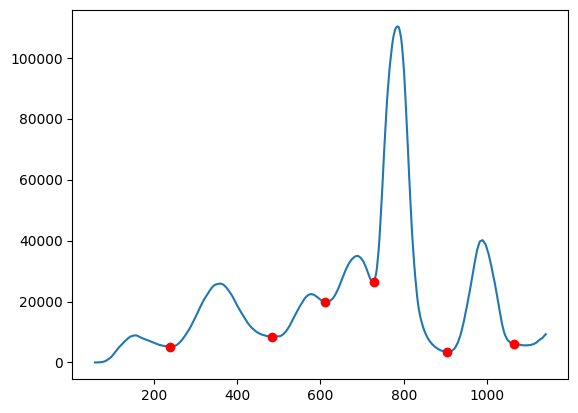

In [44]:
# Сглаживание скользящим средним и поиск точек перегиба
roll_mean = pd.Series(daily_cases).rolling(60).mean()
plt.plot(roll_mean, zorder=1)

last_v = 0
idxs = [50, ]
suspect = False
for i, v in enumerate(roll_mean):

    if suspect:
        if v > last_v:
            if (i - idxs[-1]) > 60:
                idxs.append(i-15)
                plt.scatter(i, v, c='red', zorder=2)
        suspect = False

    if v < last_v:
        suspect = True
    last_v = v

print(idxs)
plt.show()

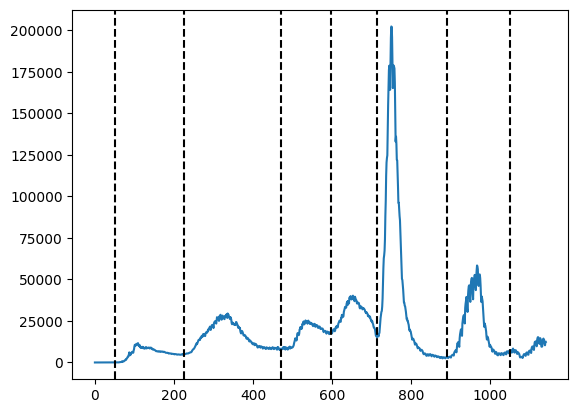

In [45]:
plt.plot(daily_cases)
for i in idxs:
    plt.axvline(i, ls='--', c='black')

In [46]:
waves = list(zip(idxs[:-1], idxs[1:]))
waves

[(50, 225), (225, 470), (470, 597), (597, 713), (713, 890), (890, 1050)]

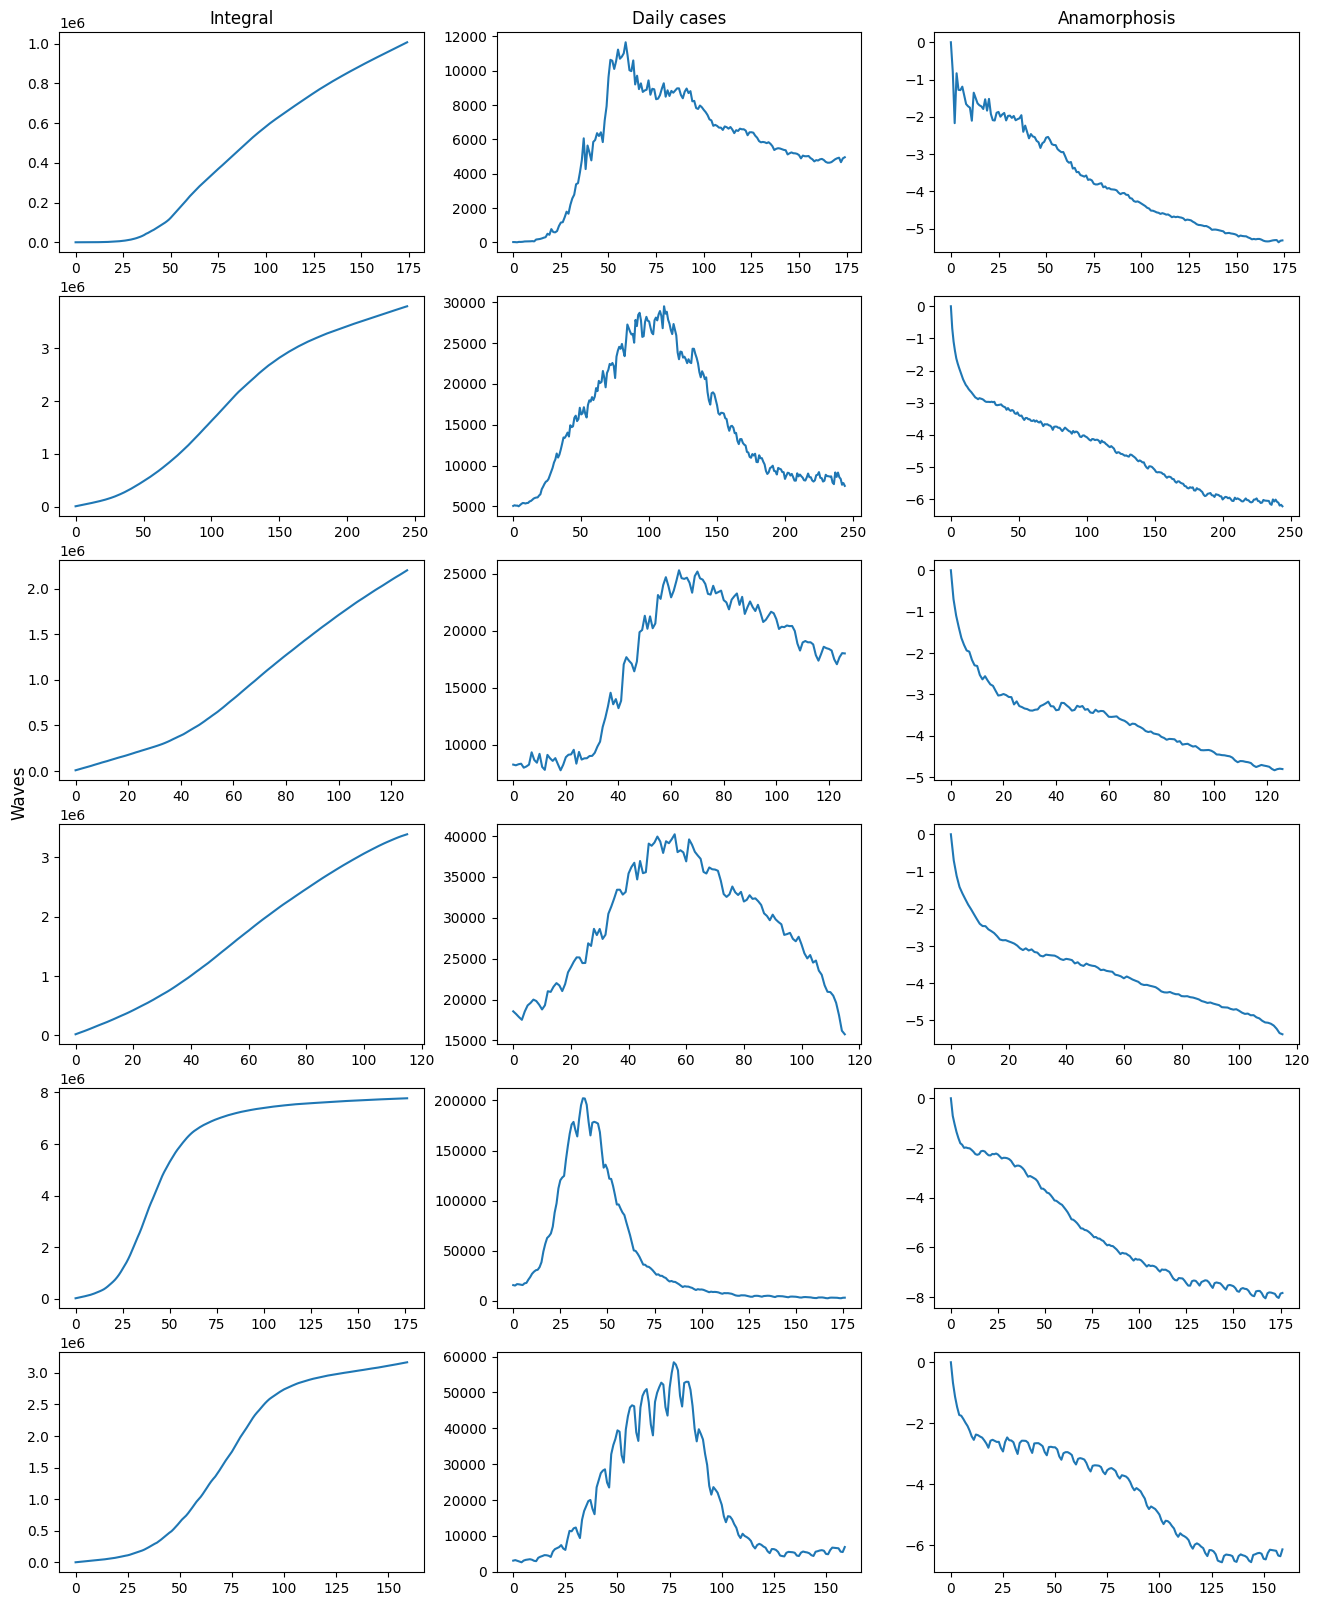

In [47]:
fig, axs = plt.subplots(len(waves), 3, figsize=(16, 20))
fig.text(0.10, 0.5, 'Waves', ha='center', va='center', rotation='vertical', size=12)

# model = LinearRegression()

axs[0, 0].set_title("Integral")
axs[0, 1].set_title("Daily cases")
axs[0, 2].set_title("Anamorphosis")
# axs[0, 3].set_title("ln(y)")
for i in range(len(waves)):
    anam, accum = anamorf(daily_cases, *waves[i])
    axs[i, 0].plot(accum)
    axs[i, 1].plot(daily_cases[waves[i][0]:waves[i][1]])
    axs[i, 2].plot(anam) # Брать отступ?
    # a, b = ne_anamorf(daily_cases, *waves[i])
    # axs[i, 3].plot(a, b)
    # model.fit(a.reshape((-1, 1)), b)
    # axs[i, 3].plot(a, [(model.intercept_ + model.coef_*x)[0] for x in a], label=f'k={model.coef_[0][0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_[0]/model.coef_[0][0]*-1):,.0f}')
    # axs[i, 3].legend()
    # print(f"{np.e**(model.intercept_[0]/model.coef_[0][0]*-1):.0f}")
plt.show()

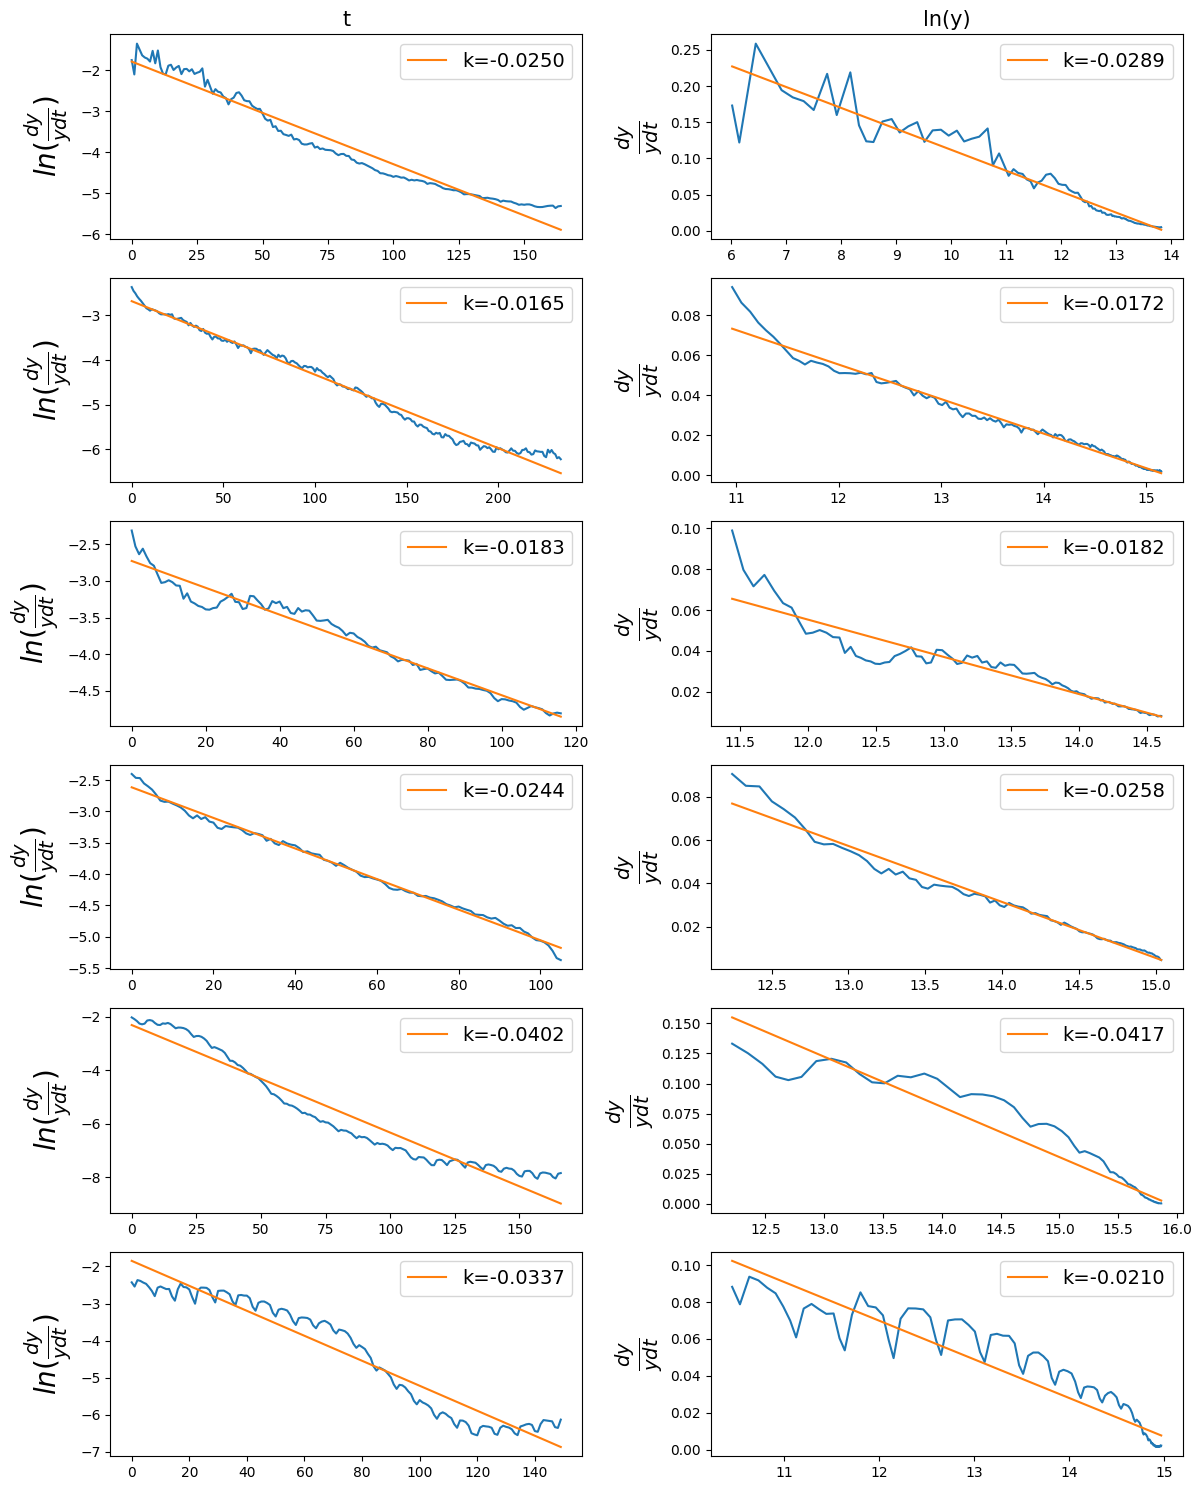

In [48]:
model = LinearRegression()

fig, axs = plt.subplots(len(waves), 2, figsize=(12,15))
g_params = list()
for i in range(len(waves)):
    # Gompertz 1
    anam, acum = anamorf(daily_cases, *waves[i])
    axs[i, 0].plot(anam[10:])
    ts = np.array(range(len(acum[10:])))
    model.fit(ts.reshape((-1, 1)), anam[10:])
    axs[i, 0].plot(ts, [(model.intercept_ + model.coef_*x)[0] for x in ts], label=f'k={model.coef_[0]:.4f}')
    axs[i, 0].legend(prop={'size': 14})
    axs[i, 0].set_ylabel(r"$ln(\frac{dy}{ydt})$", size=20)
    g_params.append([-model.coef_[0], ])

    # Gompertz 2
    step = 1
#     if i == 4:
#         step = -1  # For last wave
    acum, anam = ne_anamorf(daily_cases, *waves[i], step=step)

    axs[i, 1].plot(acum[10:], anam[10:])
    model.fit(acum[10:].reshape((-1, 1)), anam[10:])

#     if i == 4:
#         if step == 1:
#             axs[i, 1].plot(acum[10:], [(model.intercept_+0.01 + (model.coef_)*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')
#             axs[i, 1].plot(acum[10:], [(model.intercept_-0.1 + (model.coef_+0.007)*x)[0] for x in acum[10:]], c='tab:orange')
#         else:
#             edge = len(acum) // 3
#             model.fit(acum[10:edge].reshape((-1, 1)), anam[10:edge])
#             axs[i, 1].plot(acum[10:], [(model.intercept_-0.19 + model.coef_*x*0)[0] for x in acum[10:]])
#             model.fit(acum[10:-edge].reshape((-1, 1)), anam[10:-edge])
#             axs[i, 1].plot(acum[10:], [(model.intercept_+0.36 + (model.coef_-0.025)*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]-0.025:.4f}')
#     else:
#         axs[i, 1].plot(acum[10:], [(model.intercept_ + model.coef_*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}')

    axs[i, 1].plot(acum[10:], [(model.intercept_ + model.coef_*x)[0] for x in acum[10:]], label=f'k={model.coef_[0]:.4f}')

    axs[i, 1].legend(prop={'size': 14})
    axs[i, 1].set_ylabel(r"$\frac{dy}{ydt}$", size=20)
    g_params[-1].append(np.e**(model.intercept_/model.coef_[0]*-1))

# g_params[-1]=[-(model.coef_[0]-0.025), np.e**(model.intercept_/model.coef_[0]*-1)]

axs[0, 0].set_title("t", size=15)
axs[0, 1].set_title("ln(y)", size=15)
plt.tight_layout()
plt.show()

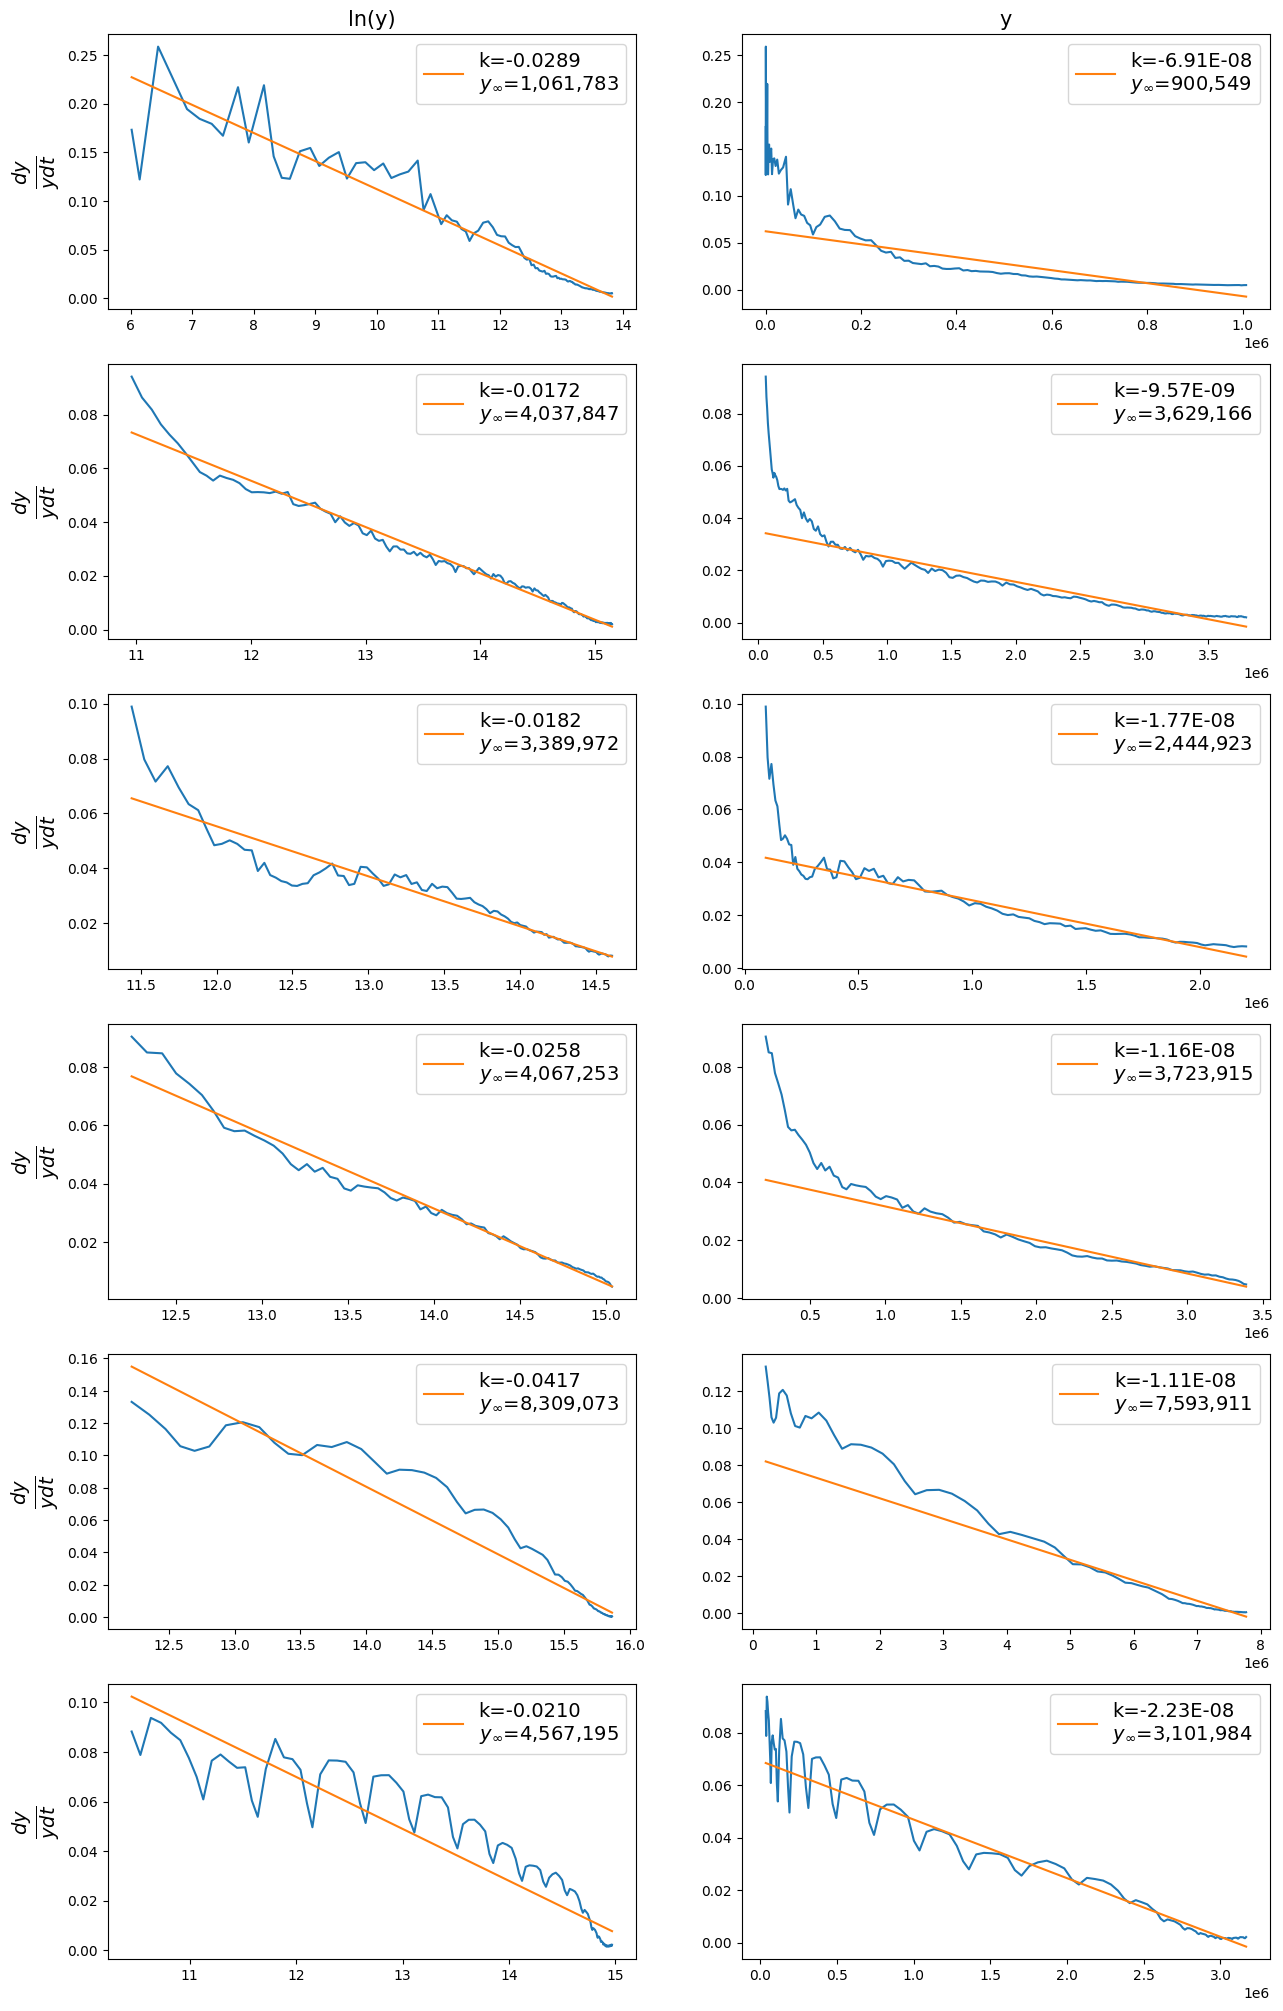

In [49]:
model = LinearRegression()

fig, axs = plt.subplots(len(waves), 2, figsize=(15, 25))
for i in range(len(waves)):
    # Gompertz
    step = 1
#     if i == 4:
#         step = -1
    a, b = ne_anamorf(daily_cases, *waves[i], step=step)
    axs[i, 0].plot(a[10:], b[10:])
    model.fit(a[10:].reshape((-1, 1)), b[10:])

#     if i == 4:
#         if step == 1:
#             axs[i, 0].plot(a[10:], [(model.intercept_+0.01 + (model.coef_)*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')
#             axs[i, 0].plot(a[10:], [(model.intercept_-0.1 + (model.coef_+0.007)*x)[0] for x in a[10:]], c='tab:orange')
#         else:
#             edge = len(a) // 3
#             model.fit(a[10:edge].reshape((-1, 1)), b[10:edge])
#             axs[i, 0].plot(a[10:], [(model.intercept_-0.19 + model.coef_*x*0)[0] for x in a[10:]])
#             model.fit(a[20:-edge].reshape((-1, 1)), b[20:-edge])
#             axs[i, 0].plot(a[20:], [(model.intercept_+0.36 + (model.coef_-0.025)*x)[0] for x in a[20:]], label=f'k={model.coef_[0]-0.025:.4f}\n'+r'$y_\infty$'+f'={np.e**((model.intercept_+0.36)/(model.coef_[0]-0.025)*-1):,.0f}')
#     else:
#         axs[i, 0].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')

    axs[i, 0].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.4f}\n'+r'$y_\infty$'+f'={np.e**(model.intercept_/model.coef_[0]*-1):,.0f}')

    axs[i, 0].legend(prop={'size': 14})
    axs[i, 0].set_ylabel(r"$\frac{dy}{ydt}$", size=20)

    # Logistic
    a, b = ne_anamorf(daily_cases, *waves[i], typ='logistic')
    axs[i, 1].plot(a[10:], b[10:])
    model.fit(np.array(a[40:]).reshape((-1, 1)), b[40:])
    axs[i, 1].plot(a[10:], [(model.intercept_ + model.coef_*x)[0] for x in a[10:]], label=f'k={model.coef_[0]:.2E}\n'+r'$y_\infty$'+f'={model.intercept_/model.coef_[0]*-1:,.0f}')
    axs[i, 1].legend(prop={'size': 14})
    g_params[i].append(model.intercept_/model.coef_[0]*-1)

axs[0, 0].set_title("ln(y)", size=15)
axs[0, 1].set_title("y", size=15)
plt.show()

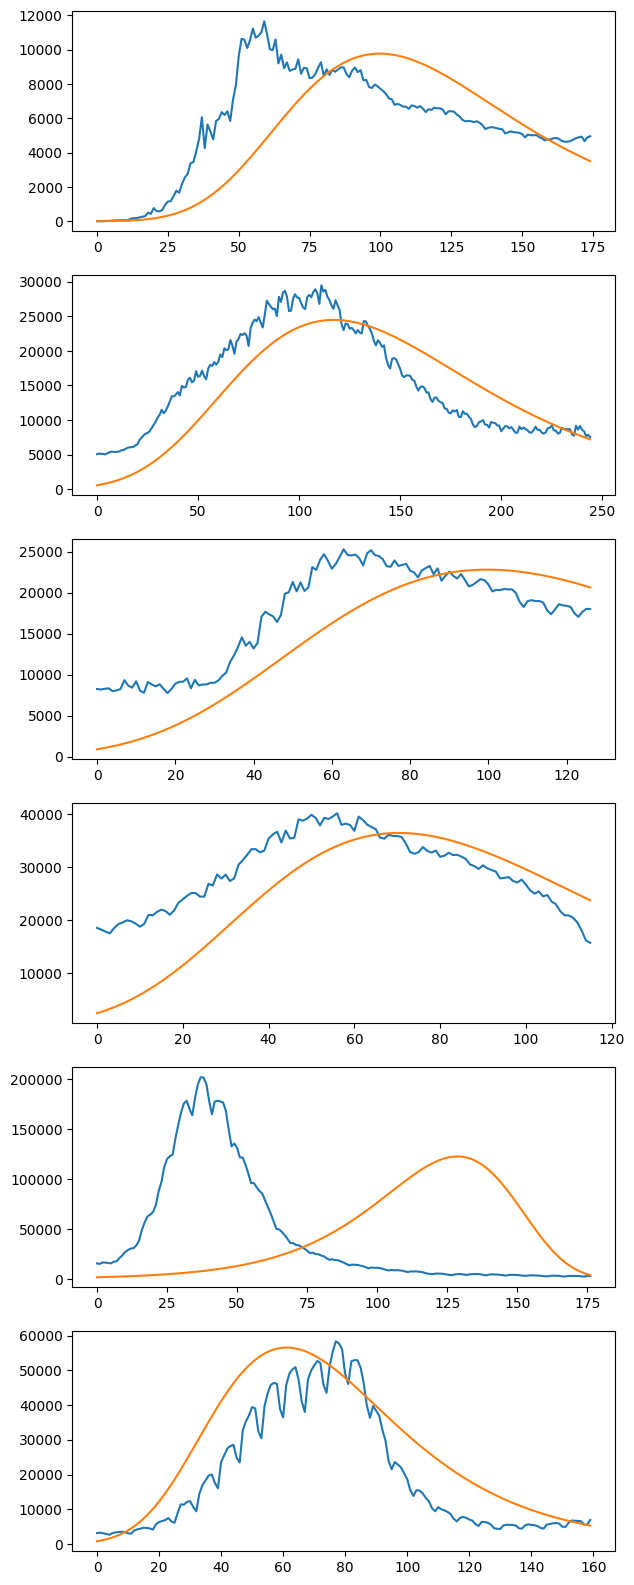

In [50]:
fig, axs = plt.subplots(len(waves), figsize=(7, 20))
#fig.text(0.10, 0.5, 'Waves', ha='center', va='center', rotation='vertical', size=12)

# model = LinearRegression()

# axs[0, 3].set_title("ln(y)")
for i in range(len(waves)):
    test = daily_cases[waves[i][0]:waves[i][1]]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test))[1]
    axs[i].plot(test)
    if i == 4:
        axs[i].plot(model[::-1])
    else: axs[i].plot(model)
plt.show()

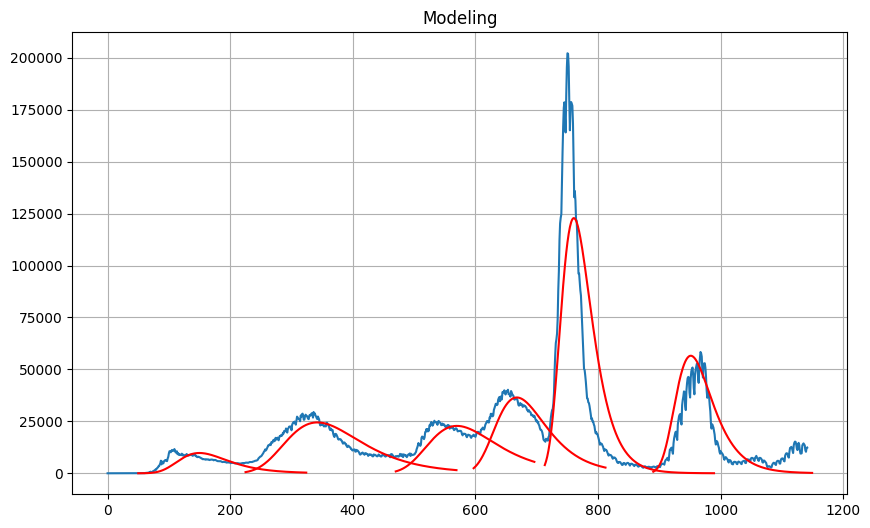

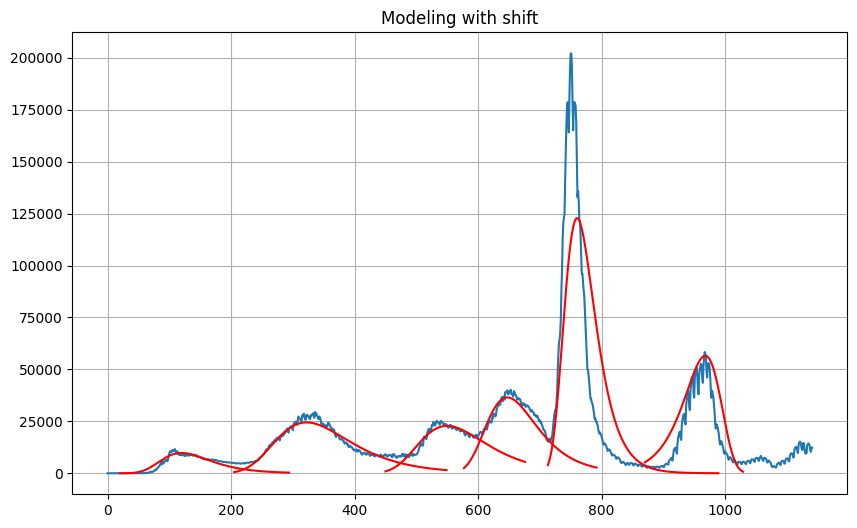

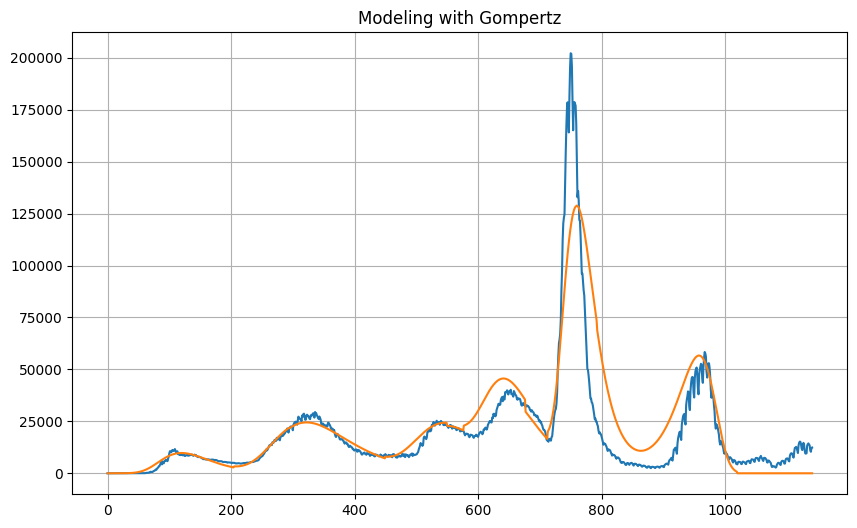

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling")

for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+100)[1]
    plt.plot(range(start, stop+100), model, color='red')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling with shift")

for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    add = 100
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+add)[1]
    if i < 1:
        plt.plot(range(start-30, stop+add-30), model, color='red')
    elif i < 3:
        plt.plot(range(start-20, stop+add-20), model, color='red')
    elif i == 3:
        plt.plot(range(start-20, stop+add-20), model, color='red')
    elif i == 5:
        model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test))[1]
        plt.plot(range(start-20, stop-20), model[::-1], color='red')

    else:
        plt.plot(range(start, stop+add), model, color='red')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_cases, label="Daily cases")
plt.title("Modeling with Gompertz")

gompertz_data = [0, ] * len(daily_cases)
for i in range(len(waves)):
    start = waves[i][0]
    stop = waves[i][1]
    add = 100
    sub = 0
    test = daily_cases[start:stop]
    model = gomp_model(y_0=test[0], k=g_params[i][0], y_max=g_params[i][1], t_range=len(test)+add)[1]

    # Сдвиг моделей
    if i == 0:
        sub = 30
    elif i < 4:
        sub = 20
    elif i == 5:
        for j in range(start, stop+add):
            gompertz_data[j-add-30] = gompertz_data[j-add-30] + model[-(j-start)-1]
        start, stop = (0, -add)
#     # Поправка (разворот) для последней модели
#     elif i == 4:
#         for j in range(start, stop+add):
#             gompertz_data[j-add] = gompertz_data[j-add] + model[-(j-start)-1]
#         start, stop = (0, -add)

    for j in range(start, stop+add):
        if j < len(gompertz_data):
            gompertz_data[j-sub] = gompertz_data[j-sub] + model[j-start]

plt.plot(gompertz_data)
plt.grid(True)
plt.show()

In [52]:
MAPE = 0
for i in range(210, 1010):
    MAPE += abs(gompertz_data[i] - daily_cases[i]) / daily_cases[i]
MAPE /= 800
print(f"{MAPE * 100:.2f}%")

64.65%


TODO:
Сравнить анаморфозы с методом наименьших крадратов / максимального правдаподобия